*   reading the image
*   writing on image
*   slicing,resizing,rotaion
*   rectangle,circle,line drawing






In [2]:
pip install imutils

In [20]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

In [5]:
# reading image of jurassic movie
image=cv2.imread('/content/jp.png')

In [8]:
# printing height, width, depth
(h,w,d)=image.shape
print('width {}, height {}, depth {}'.format(h,w,d))

width 322, height 600, depth 3


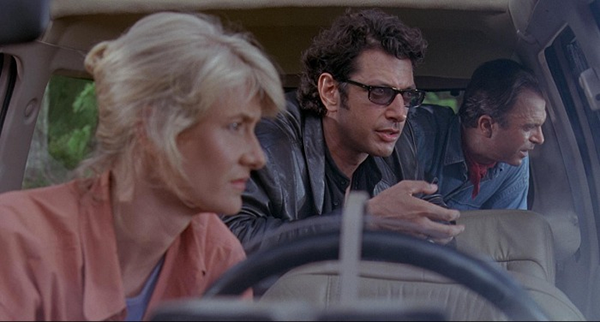

In [14]:
# to show image in colab
cv2_imshow(image)



In [15]:
# getting pixel value in each point
B,G,R=image[100,50]
print('B-{},G-{},R-{}'.format(B,G,R))

B-37,G-49,R-41


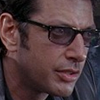

In [16]:
#slicing the image
roi=image[60:160,320:420]
cv2_imshow(roi)

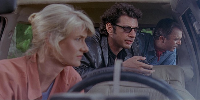

In [17]:
# resizing image without considering aspect ratio
resize=cv2.resize(image,(200,100))
cv2_imshow(resize)

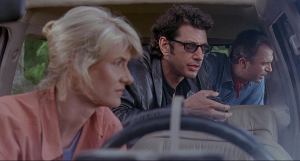

In [18]:
# considering aspect ratio while calculating width and height
r=300.0/w
dims=(300,int(h*r))
resize=cv2.resize(image,dims)
cv2_imshow(resize)

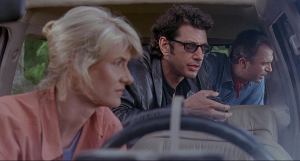

In [22]:
# using imutils to resize will consider aspect ration automatic
resize=imutils.resize(image,width=300) # takes two argument image, and width or height
cv2_imshow(resize)

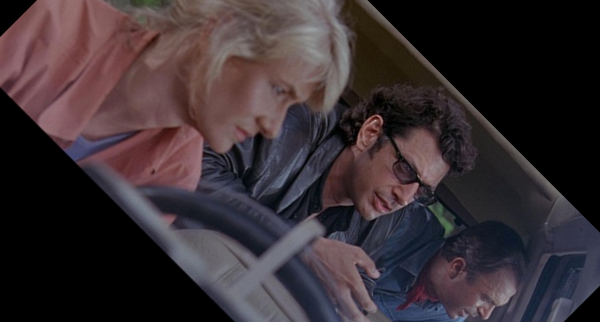

In [24]:
# rotating the image ,negative signs represent clockwise
# getting rotation matrix 
# then using image and rotation matrix to produce rotated image
center=(w//2,h//2)
M=cv2.getRotationMatrix2D(center,-45,1.0)
rotated=cv2.warpAffine(image,M,(w,h))
cv2_imshow(rotated)

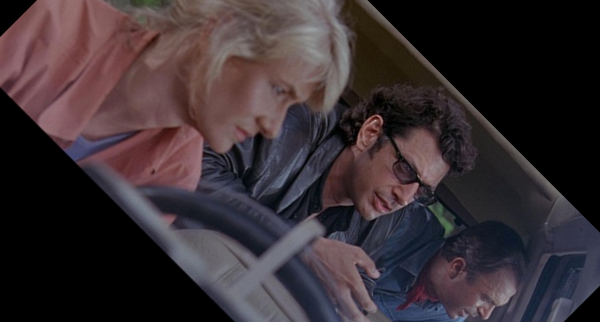

In [25]:
# using imutils to rotate
rotated=imutils.rotate(image,-45)
cv2_imshow(rotated)

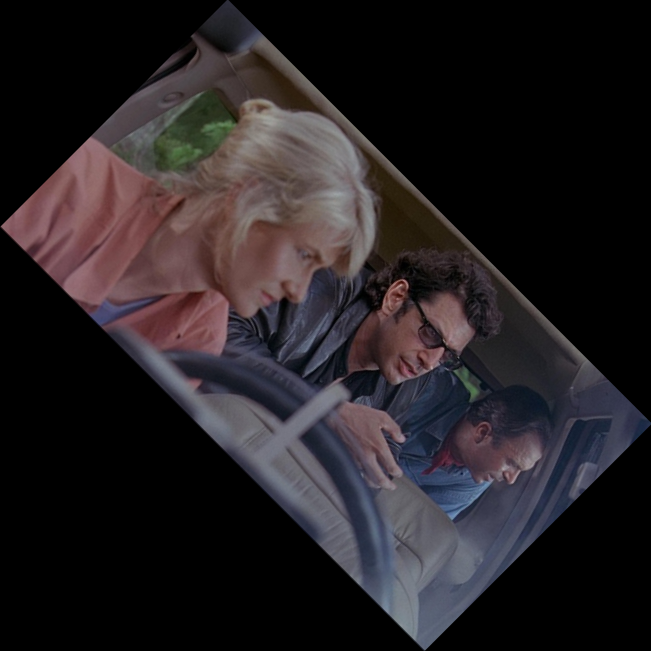

In [27]:
#to avoid clipping
# rotate_bound in imutils using + for clockwise
rotated=imutils.rotate_bound(image,45)
cv2_imshow(rotated)

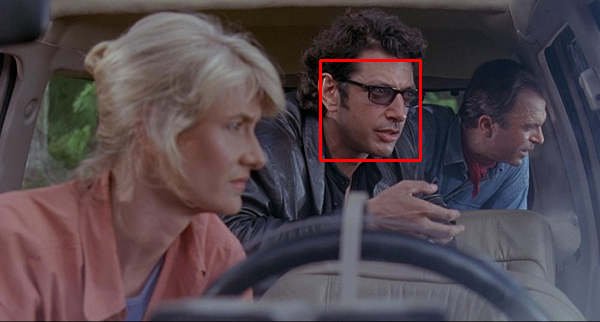

In [28]:
# drawing rectangle aroung face
output=image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)# image,topleft,bottom right, color of rectangle(b,g,r),thickness
cv2_imshow(output)

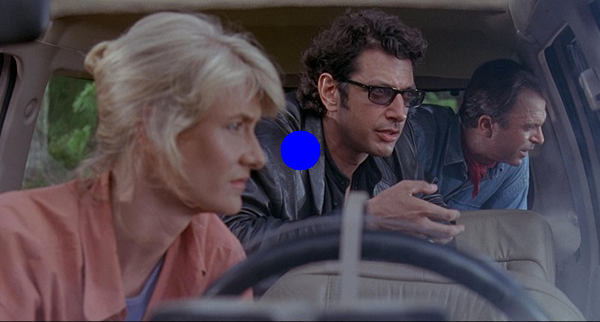

In [29]:
# to draw solid blue circle
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)# image, center, radius in pixel, circle color, -1 indicate full/solid
cv2_imshow(output)

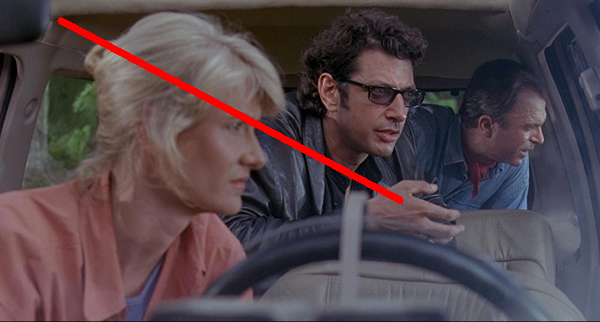

In [30]:
# draw line
output=image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
cv2_imshow(output)

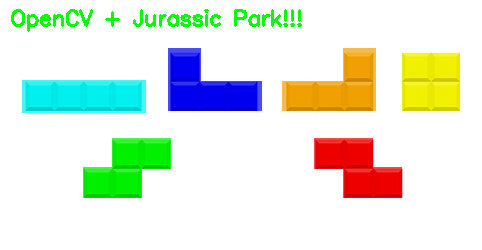

In [42]:
# draw green text on the image
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2_imshow(output)

    image in tutorial tetris
    Learning how to convert images to grayscale with OpenCV
    Performing edge detection
    Thresholding a grayscale image
    Finding, counting, and drawing contours
    Conducting erosion and dilation
    Masking an image


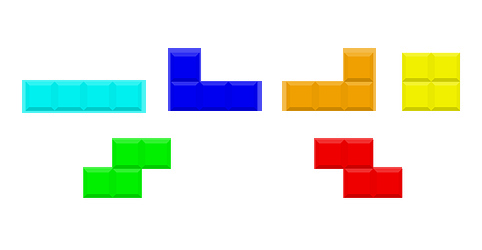

In [31]:
image=cv2.imread('/content/tetris_blocks.png')
cv2_imshow(image)

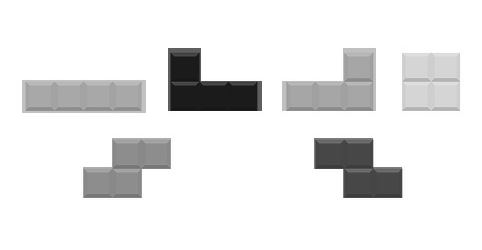

In [32]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

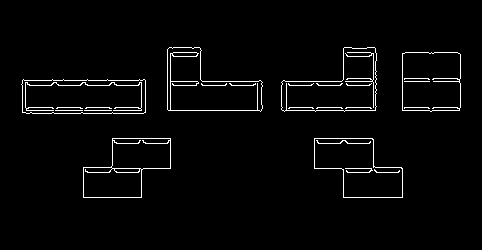

In [34]:
# edge detection
edge=cv2.Canny(gray,30,150)#image,min thershold,max threshold
cv2_imshow(edge)

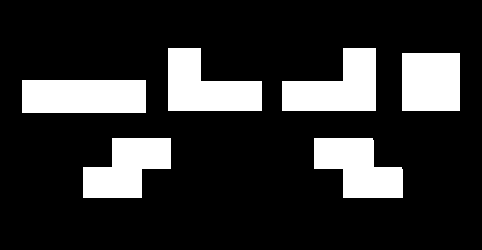

In [35]:
#thresholding
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

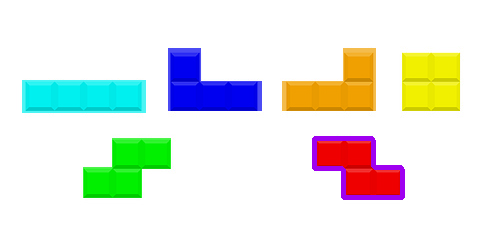

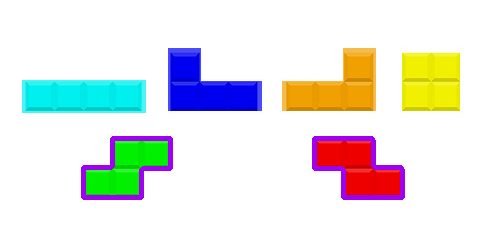

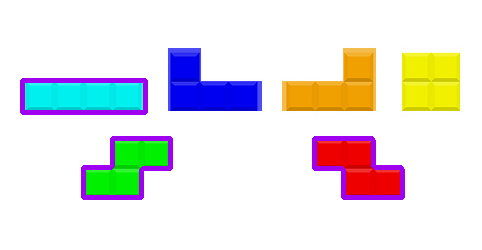

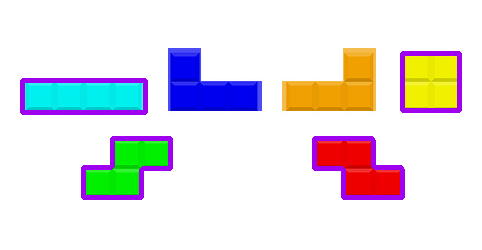

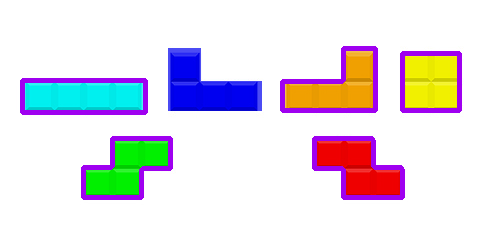

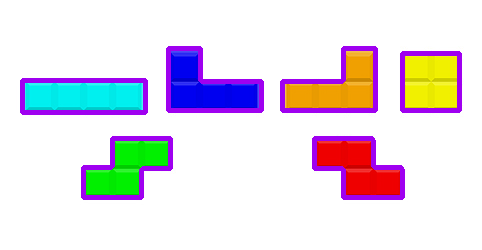

In [36]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)# use always with cv2.findcontours
output = image.copy()
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	cv2_imshow(output)
	

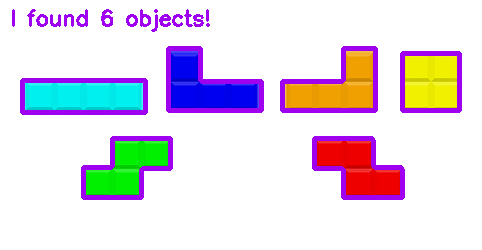

In [38]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
cv2_imshow(output)

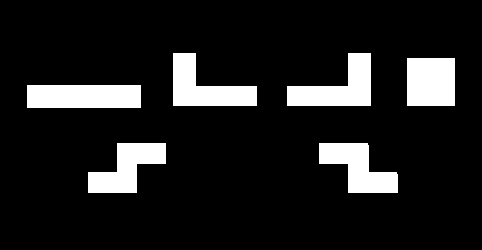

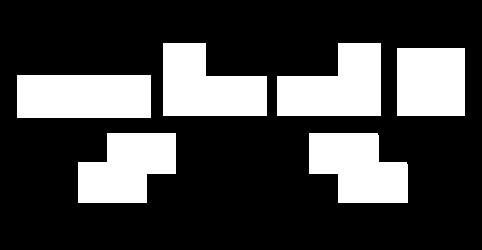

In [40]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)

# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)

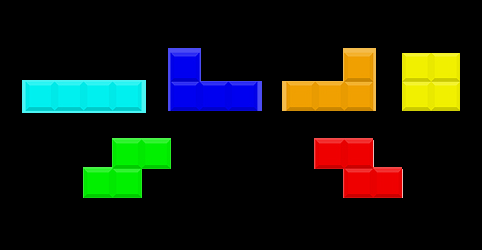

In [41]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)